## IMDB Yorumları Üzerine NLP Analizi: Duygu Sınıflandırması ve Görselleştirme
by Yağmur Aksoy

### 1. Verinin Yüklenmesi

In [1]:
import pandas as pd

file_path = r"C:\Users\aksoy\Downloads\asset-v1_Kodlasam+DS_02+2023_07_05+type@asset+block@IMDB_Dataset.csv"
imdb_data = pd.read_csv(file_path)
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### 2.Verinin İncelenmesi ve Keşifçi Veri Analizi

##### Bu proje, IMDB'den alınan film yorumlarını içeren bir veri seti üzerinde Doğal Dil İşleme (NLP) yöntemlerini kullanarak duygu analizi yapmayı amaçlamaktadır. Veri seti, her biri bir yorumu ve o yoruma karşılık gelen pozitif veya negatif etiketini içeren basit bir yapıya sahiptir.

#### Veri Seti Yapısı

Review (Yorum): Kullanıcıların belirli bir film hakkında yazdığı yorumlar. Metin formatında.

Sentiment (Duygu): Yorumun pozitif (positive) ya da negatif (negative) olarak etiketlendiği bir sınıf.

#### Pozitif ve Negatif Dağılım Yüzdesi

In [7]:
sentiment_distribution = imdb_data['sentiment'].value_counts()
percentage_distribution = (sentiment_distribution / len(imdb_data)) * 100
sentiment_distribution, percentage_distribution

(sentiment
 positive    25000
 negative    25000
 Name: count, dtype: int64,
 sentiment
 positive    50.0
 negative    50.0
 Name: count, dtype: float64)

Veride dengesizlik bulunmamaktadır.

#### Pozitif ve Negatif Yorumların Uzunluklarının Sonuca Etkisi

In [11]:
imdb_data['word_count'] = imdb_data['review'].apply(lambda x: len(x.split()))

# Pozitif ve negatif yorumların kelime sayısını ayrı ayrı seçelim
positive_word_counts = imdb_data[imdb_data['sentiment'] == "positive"]['word_count']
negative_word_counts = imdb_data[imdb_data['sentiment'] == "negative"]['word_count']

# Pozitif kelime sayısı için istatistikler
positive_mean = positive_word_counts.mean()
positive_median = positive_word_counts.median()
positive_mode = positive_word_counts.mode()[0]

# Negatif kelime sayısı için istatistikler
negative_mean = negative_word_counts.mean()
negative_median = negative_word_counts.median()
negative_mode = negative_word_counts.mode()[0]

# Sonuçlar
{
    "positive": {
        "mean": positive_mean,
        "median": positive_median,
        "mode": positive_mode
    },
    "negative": {
        "mean": negative_mean,
        "median": negative_median,
        "mode": negative_mode
    }
}

{'positive': {'mean': np.float64(232.84932),
  'median': np.float64(172.0),
  'mode': np.int64(127)},
 'negative': {'mean': np.float64(229.46456),
  'median': np.float64(174.0),
  'mode': np.int64(123)}}

In [13]:
# Pozitif ve negatif istatistikler
stats = {
    'positive': {'mean': 232.84932, 'median': 172.0, 'mode': 127},
    'negative': {'mean': 229.46456, 'median': 174.0, 'mode': 123}
}

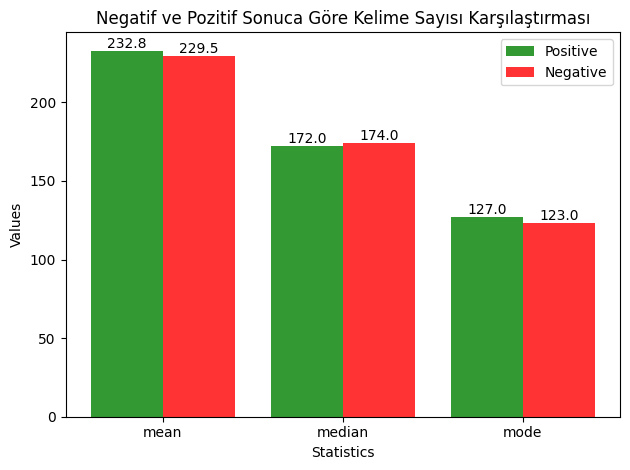

In [15]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['mean', 'median', 'mode']
positive_values = [stats['positive'][key] for key in categories]
negative_values = [stats['negative'][key] for key in categories]

x = np.arange(len(categories)) 
width = 0.40  

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, positive_values, width, label='Positive', alpha=0.8 ,color='Green')
bars2 = ax.bar(x + width/2, negative_values, width, label='Negative', alpha=0.8 ,color='Red')

ax.set_xlabel('Statistics')
ax.set_ylabel('Values')
ax.set_title('Negatif ve Pozitif Sonuca Göre Kelime Sayısı Karşılaştırması')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}',
            ha='center', va='bottom')
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Pozitif ve Negatif Kelime Dağılımları

In [18]:
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# HTML etiketlerini temizleme fonksiyonu
def clean_html(text):
    return re.sub(r'<.*?>', '', text)

In [20]:
# Verilerden HTML etiketlerini temizleyelim
imdb_data['review'] = imdb_data['review'].apply(clean_html)

In [22]:
stopwords = set(STOPWORDS)

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return " ".join(filtered_words)

# Stopwords'leri temizleyerek yorumları güncelleyelim
imdb_data['review'] = imdb_data['review'].apply(remove_stopwords)

In [23]:
def clean_review(text):
    # Noktalama işaretlerini temizleme
    text = re.sub(r'[^\w\s]', '', text)
    # Tüm metni küçük harflere çevirme
    text = text.lower()
    return text

imdb_data['review'] = imdb_data['review'].apply(clean_review)

In [26]:
# Pozitif ve negatif yorumları ayıralım
positive_reviews = " ".join(imdb_data[imdb_data['sentiment'] == 'positive']['review'])
negative_reviews = " ".join(imdb_data[imdb_data['sentiment'] == 'negative']['review'])

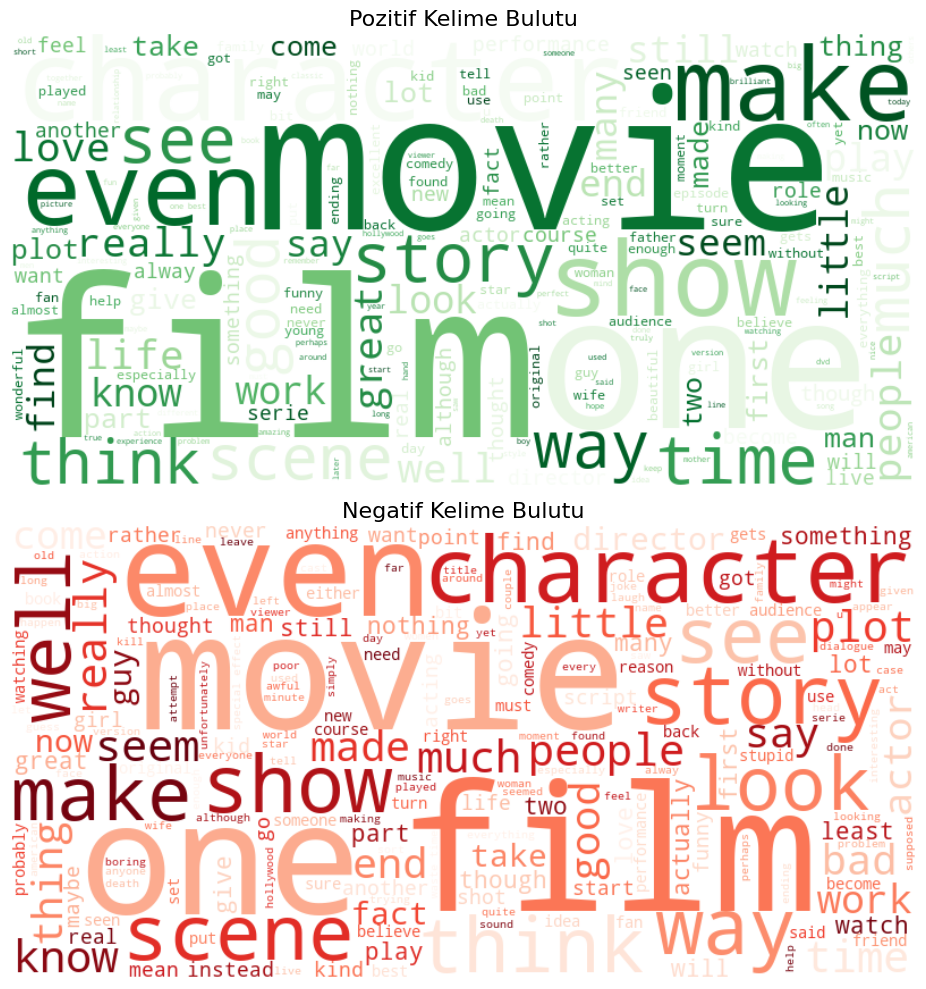

In [28]:
positive_wc = WordCloud(stopwords=stopwords, background_color="white", colormap="Greens", width=800, height=400).generate(positive_reviews)
negative_wc = WordCloud(stopwords=stopwords, background_color="white", colormap="Reds", width=800, height=400).generate(negative_reviews)
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Pozitif kelime bulutu
axes[0].imshow(positive_wc, interpolation='bilinear')
axes[0].set_title("Pozitif Kelime Bulutu", fontsize=16)
axes[0].axis("off")

# Negatif kelime bulutu
axes[1].imshow(negative_wc, interpolation='bilinear')
axes[1].set_title("Negatif Kelime Bulutu", fontsize=16)
axes[1].axis("off")

# Görselleştirme
plt.tight_layout()
plt.show()

In [34]:
from collections import Counter
# Pozitif WordCloud'dan en sık geçen 20 kelimeyi listeleyelim
positive_word_freq = Counter([word for word in positive_reviews.split() if word not in stopwords])
top_20_positive = positive_word_freq.most_common(20)

# Negatif WordCloud'dan en sık geçen 20 kelimeyi listeleyelim
negative_word_freq = Counter([word for word in negative_reviews.split() if word not in stopwords])
top_20_negative = negative_word_freq.most_common(20)

In [35]:
positive_table = pd.DataFrame(top_20_positive, columns=["Positive Word", "Frequency"])
negative_table = pd.DataFrame(top_20_negative, columns=["Negative Word", "Frequency"])

print("Top 20 Positive Words:")
print(positive_table)

print("\nTop 20 Negative Words:")
print(negative_table)

Top 20 Positive Words:
   Positive Word  Frequency
0           film      39419
1          movie      36019
2            one      25730
3           good      14342
4          great      12643
5          story      12372
6            see      11865
7           time      11771
8           well      10879
9         really      10674
10          will      10200
11          even       9363
12          much       8996
13         first       8863
14         films       8454
15          love       8397
16        people       8365
17          best       8298
18           way       7555
19          many       7509

Top 20 Negative Words:
   Negative Word  Frequency
0          movie      47488
1           film      35042
2            one      24636
3           even      14918
4           good      14141
5            bad      14068
6         really      12220
7           time      11494
8            see      10567
9           much       9898
10         story       9672
11        people       9115
1

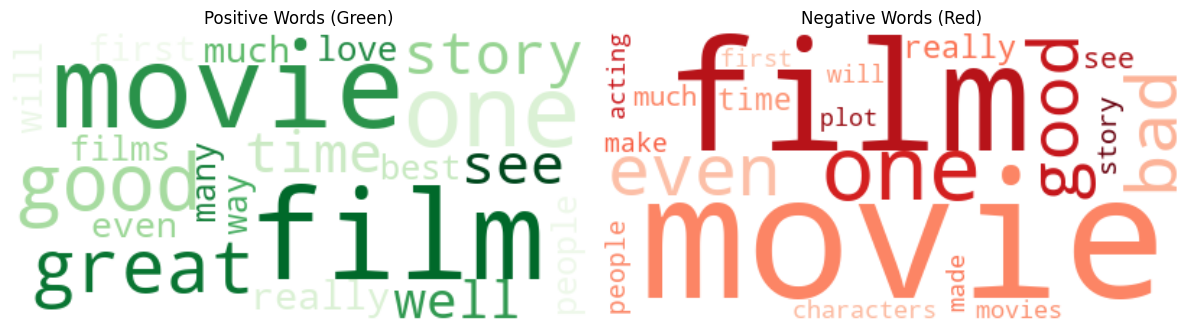

In [36]:
positive_dict = dict(top_20_positive)
negative_dict = dict(top_20_negative)

# Generate word clouds
positive_wordcloud = WordCloud(background_color="white", colormap="Greens").generate_from_frequencies(positive_dict)
negative_wordcloud = WordCloud(background_color="white", colormap="Reds").generate_from_frequencies(negative_dict)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Words (Green)")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Words (Red)")

plt.tight_layout()
plt.show()

In [40]:
def extract_filtered_bigrams(text, stopwords):
    words = [word for word in text.split() if word not in stopwords]
    bigrams = zip(words, words[1:])
    return [" ".join(bigram) for bigram in bigrams]

# Positive ve negative WordCloud verilerinden stopwords kaldırılmış bigramları çıkaralım
positive_bigrams = extract_filtered_bigrams(positive_reviews, stopwords)
negative_bigrams = extract_filtered_bigrams(negative_reviews, stopwords)

# Bigrams frekanslarını hesaplayalım
positive_bigram_freq = Counter(positive_bigrams)
negative_bigram_freq = Counter(negative_bigrams)

# En sık geçen ilk 20 bigram
top_20_positive_bigrams = positive_bigram_freq.most_common(20)
top_20_negative_bigrams = negative_bigram_freq.most_common(20)

In [41]:
positive_bigrams_table = pd.DataFrame(top_20_positive_bigrams, columns=["Positive Bigram", "Frequency"])
negative_bigrams_table = pd.DataFrame(top_20_negative_bigrams, columns=["Negative Bigram", "Frequency"])

# Sonuçları gösterelim
print("Top 20 Positive Bigrams:")
print(positive_bigrams_table)

print("\nTop 20 Negative Bigrams:")
print(negative_bigrams_table)

Top 20 Positive Bigrams:
    Positive Bigram  Frequency
0          one best       1599
1       even though       1016
2        first time        905
3          new york        802
4   special effects        763
5         see movie        712
6         years ago        703
7       great movie        650
8        good movie        634
9         well done        602
10        real life        571
11      pretty good        556
12         must see        556
13        saw movie        553
14      watch movie        546
15      years later        527
16       great film        526
17      really good        523
18      high school        519
19         see film        504

Top 20 Negative Bigrams:
    Negative Bigram  Frequency
0   special effects       1369
1        waste time       1349
2       much better        955
3         one worst        936
4       even though        852
5         bad movie        840
6        low budget        838
7       watch movie        722
8       worst movie

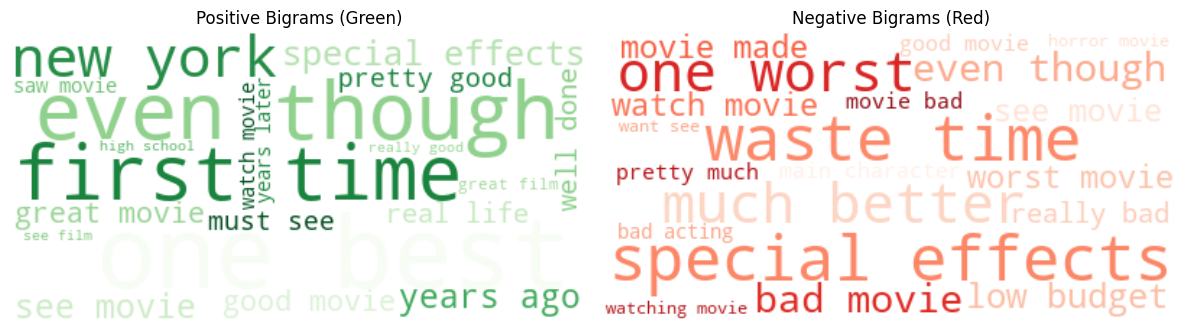

In [44]:
positive_bigrams_dict = dict(top_20_positive_bigrams)
negative_bigrams_dict = dict(top_20_negative_bigrams)

# Generate word clouds
positive_bigrams_wordcloud = WordCloud(background_color="white", colormap="Greens").generate_from_frequencies(positive_bigrams_dict)
negative_bigrams_wordcloud = WordCloud(background_color="white", colormap="Reds").generate_from_frequencies(negative_bigrams_dict)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_bigrams_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Bigrams (Green)")

plt.subplot(1, 2, 2)
plt.imshow(negative_bigrams_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Bigrams (Red)")

plt.tight_layout()
plt.show()

In [46]:
# Fonksiyon: Üçlü (trigram) oluşturma
def extract_trigrams(text, stopwords):
    words = [word for word in text.split() if word not in stopwords]
    trigrams = zip(words, words[1:], words[2:])
    return [" ".join(trigram) for trigram in trigrams]

positive_trigrams = extract_trigrams(positive_reviews, stopwords)
negative_trigrams = extract_trigrams(negative_reviews, stopwords)

positive_trigram_freq = Counter(positive_trigrams)
negative_trigram_freq = Counter(negative_trigrams)

# En sık geçen ilk 20 trigram
top_20_positive_trigrams = positive_trigram_freq.most_common(20)
top_20_negative_trigrams = negative_trigram_freq.most_common(20)

In [47]:
positive_trigrams_table = pd.DataFrame(top_20_positive_trigrams, columns=["Positive Trigram", "Frequency"])
negative_trigrams_table = pd.DataFrame(top_20_negative_trigrams, columns=["Negative Trigram", "Frequency"])

# Sonuçları gösterelim
print("Top 20 Positive Trigrams:")
print(positive_trigrams_table)

print("\nTop 20 Negative Trigrams:")
print(negative_trigrams_table)

Top 20 Positive Trigrams:
               Positive Trigram  Frequency
0                 new york city        180
1                  world war ii        153
2               one best movies        139
3                one best films        124
4                first time saw        121
5              based true story        120
6               first saw movie         91
7        highly recommend movie         85
8                seen long time         85
9           well worth watching         79
10  international film festival         79
11               first saw film         73
12               many years ago         70
13          one favorite movies         67
14       recommend movie anyone         67
15        highly recommend film         65
16             second world war         63
17          two main characters         63
18            well worth seeing         61
19             movie first time         61

Top 20 Negative Trigrams:
           Negative Trigram  Frequency
0    

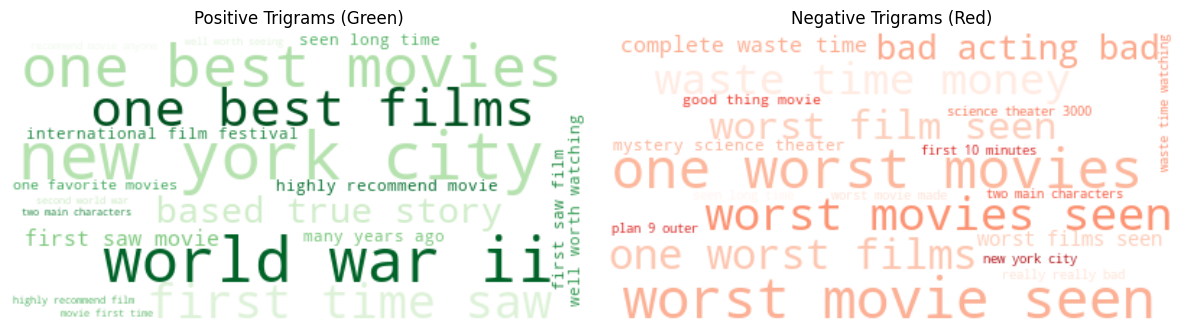

In [50]:
positive_trigrams_dict = dict(top_20_positive_trigrams)
negative_trigrams_dict = dict(top_20_negative_trigrams)

positive_trigrams_wordcloud = WordCloud(background_color="white", colormap="Greens").generate_from_frequencies(positive_trigrams_dict)
negative_trigrams_wordcloud = WordCloud(background_color="white", colormap="Reds").generate_from_frequencies(negative_trigrams_dict)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_trigrams_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Trigrams (Green)")

plt.subplot(1, 2, 2)
plt.imshow(negative_trigrams_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Trigrams (Red)")

plt.tight_layout()
plt.show()

Üçlü kelime kombinasyonlarını (trigrams) seçmemizin temel nedeni, metin analizinde daha zengin bağlam sağlamalarıdır. Trigramlar, kelimelerin birlikte nasıl kullanıldığını göstererek, metnin duygusunu veya amacını daha doğru bir şekilde yansıtır. Örneğin, "I highly recommend" veya "one worst movies" gibi trigramlar, tek başına kelimelerden veya ikilemelerden daha net bir anlam sunar. Bu, sentiment analizi gibi görevlerde daha iyi sonuçlar elde etmemizi sağlar.

#### Teknik Jargonun Yorumla İlişkisi

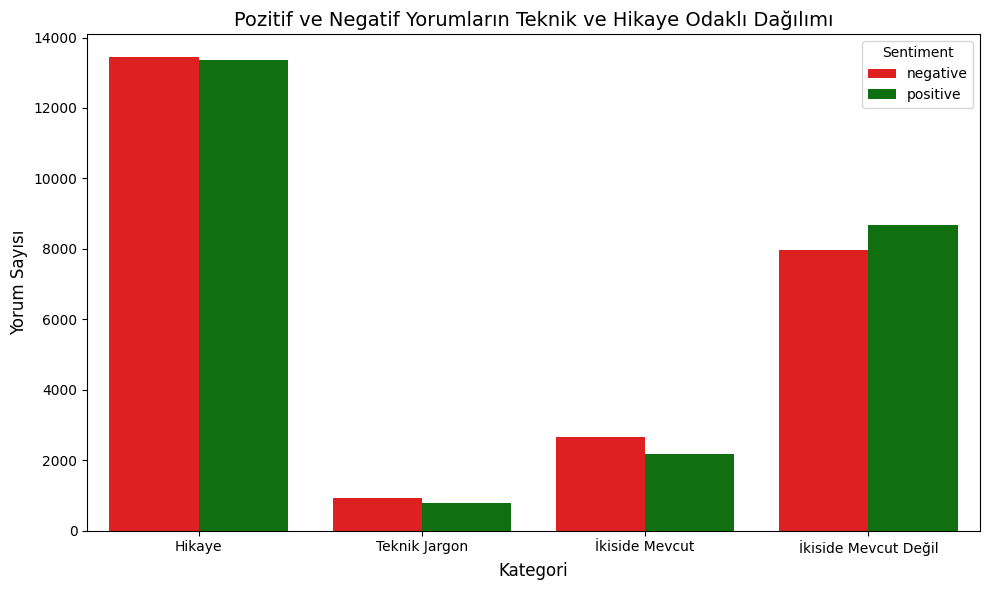

In [54]:
# Teknik ve hikaye unsurları için anahtar kelimeler
technical_keywords = ["cinematography", "special effects", "soundtrack", "editing","bad acting"]
story_keywords = ["story", "plot", "character", "dialogue","true story"]

# Kategorilere göre yorumları sınıflandırma fonksiyonu
def classify_category(text):
    technical_match = any(keyword in text.lower() for keyword in technical_keywords)
    story_match = any(keyword in text.lower() for keyword in story_keywords)
    if technical_match and story_match:
        return "İkiside Mevcut"
    elif technical_match:
        return "Teknik Jargon"
    elif story_match:
        return "Hikaye"
    else:
        return "İkiside Mevcut Değil"

# Yorumları kategorilere ayıralım
imdb_data["category"] = imdb_data["review"].apply(classify_category)

# Pozitif ve negatif yorumları kategori bazında sayalım
category_summary = imdb_data.groupby(["sentiment", "category"]).size().reset_index(name="count")

# Sonuçları görselleştirelim
import matplotlib.pyplot as plt
import seaborn as sns

palette = {"positive": "green", "negative": "red"}

plt.figure(figsize=(10, 6))
sns.barplot(data=category_summary, x="category", y="count", hue="sentiment", palette=palette)
plt.title("Pozitif ve Negatif Yorumların Teknik ve Hikaye Odaklı Dağılımı", fontsize=14)
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Yorum Sayısı", fontsize=12)
plt.legend(title="Sentiment", loc="upper right")
plt.tight_layout()
plt.show()


Yorumların büyük çoğunluğu hikaye, karakter ve diyaloglara odaklanırken, filmin başarısı veya başarısızlığı genellikle hikaye unsurlarıyla ilişkilendiriliyor. Teknik unsurlar, örneğin sinematografi ve özel efektler, daha az dikkat çekiyor.Pozitif ve negatif ile ilintisi bulunmamıştır.

#### Olumlu ve Olumsuz Kelimlerin Genel Yorumla İlişkisi

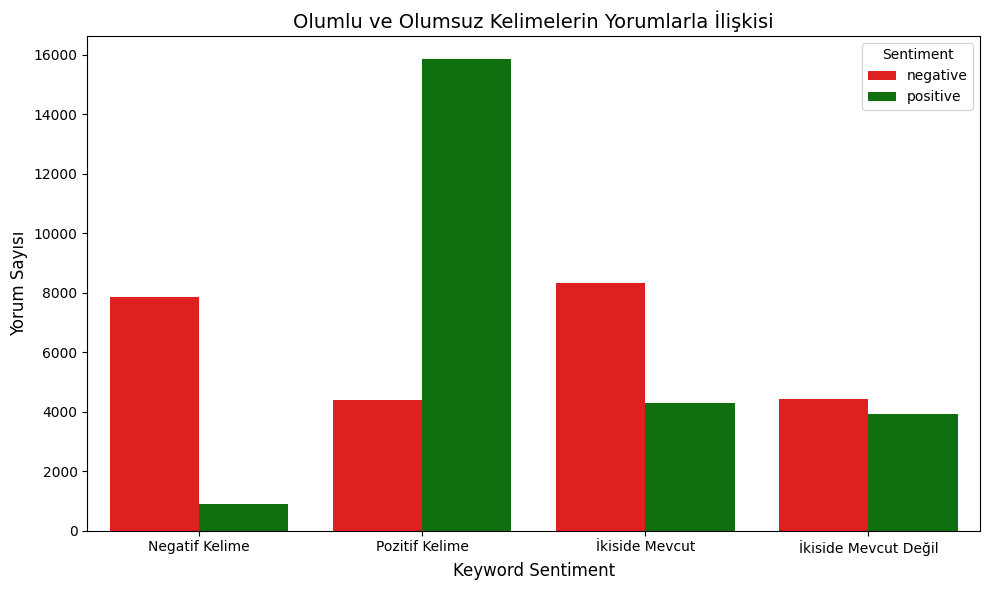

In [57]:
# Olumlu ve olumsuz anahtar kelimeler
positive_keywords = ["amazing","love","best", "great", "fantastic","worth seeing","well done", "wonderful", "excellent", "superb","innovative","favorite","laughter","stunning","recommend","must see"]
negative_keywords = ["terrible", "horrible", "worst", "boring", "awful", "bad","waste","low budget","bad movie","movie bad","bad acting","worst film","waste","waste time","waste money"]

# Anahtar kelimelere göre sınıflandırma fonksiyonu
def classify_sentiment_keywords(text):
    positive_match = any(keyword in text.lower() for keyword in positive_keywords)
    negative_match = any(keyword in text.lower() for keyword in negative_keywords)
    if positive_match and negative_match:
        return "İkiside Mevcut"
    elif positive_match:
        return "Pozitif Kelime"
    elif negative_match:
        return "Negatif Kelime"
    else:
        return "İkiside Mevcut Değil"

# Yorumları sınıflandıralım
imdb_data["keyword_sentiment"] = imdb_data["review"].apply(classify_sentiment_keywords)

# Pozitif ve negatif yorumları kategori bazında sayalım
keyword_summary = imdb_data.groupby(["sentiment", "keyword_sentiment"]).size().reset_index(name="count")

# Sonuçları görselleştirelim
plt.figure(figsize=(10, 6))
sns.barplot(data=keyword_summary, x="keyword_sentiment", y="count", hue="sentiment", palette={"positive": "green", "negative": "red"})
plt.title("Olumlu ve Olumsuz Kelimelerin Yorumlarla İlişkisi", fontsize=14)
plt.xlabel("Keyword Sentiment", fontsize=12)
plt.ylabel("Yorum Sayısı", fontsize=12)
plt.legend(title="Sentiment", loc="upper right")
plt.tight_layout()
plt.show()


Bu grafikten elde edilen sonuçlara göre, olumsuz anahtar kelimeler (Negative) içeren yorumlar yoğun bir şekilde negatif duygu taşırken, olumlu anahtar kelimeler (Positive) içeren yorumlar ağırlıklı olarak pozitif duygu taşıyor. "Both" kategorisinde hem olumlu hem olumsuz anahtar kelimeler yer almasına rağmen, bu yorumların daha az sayıda olduğu gözlemleniyor. İlginç bir şekilde, "None" kategorisinde yani anahtar kelime içermeyen yorumlarda pozitif yorumlar negatif yorumlara göre daha fazla. Bu durum, bazı yorumların duygu belirten kelimeler içermese de pozitif eğilim gösterdiğini ifade edebilir. Genel olarak, olumlu ve olumsuz kelimeler duygu tonunu belirlemede güçlü bir etkiye sahip.

In [61]:
def count_keywords(text, keywords):
    return sum(1 for word in text.lower().split() if word in keywords)

# Pozitif ve negatif kelime sayısını hesaplayıp yeni sütunlara ekleme
imdb_data['positive_count'] = imdb_data['review'].apply(lambda x: count_keywords(x, positive_keywords))
imdb_data['negative_count'] = imdb_data['review'].apply(lambda x: count_keywords(x, negative_keywords))

In [63]:
imdb_data['sentiment_score'] = imdb_data['positive_count'] - imdb_data['negative_count']

In [65]:
imdb_data.head()

,review,sentiment,word_count,category,keyword_sentiment,positive_count,negative_count,sentiment_score
0,one reviewers mentioned watching 1 oz episode ...,positive,307,İkiside Mevcut Değil,İkiside Mevcut Değil,0,0,0
1,wonderful little production filming technique ...,positive,162,Teknik Jargon,Pozitif Kelime,2,0,2
2,thought wonderful way spend time hot summer we...,positive,166,Hikaye,Pozitif Kelime,2,0,2
3,basically family little boy jake thinks zombie...,negative,138,İkiside Mevcut Değil,İkiside Mevcut Değil,0,0,0
4,petter matteis love time money visually stunni...,positive,230,Hikaye,Pozitif Kelime,3,0,3


In [67]:
negative_data = imdb_data[imdb_data['sentiment'] == 'negative']
negative_dominant_in_negative = negative_data[negative_data['negative_count'] >= negative_data['positive_count']]

# Bu durumun yüzdesi
negative_dominant_percentage_in_negative = (len(negative_dominant_in_negative) / len(negative_data)) * 100

negative_dominant_percentage_in_negative

77.116

Negatif anahtar kelimelerin çoğunlukta veya eşit olduğu yorumun kendisininde negatif olma yüzdesi yüzde 77 olarak bulundu.

In [72]:
positive_data = imdb_data[imdb_data['sentiment'] == 'positive']
positive_dominant_in_positive = positive_data[positive_data['positive_count'] >= positive_data['negative_count']]

# Bu durumun yüzdesi
positive_dominant_percentage_in_positive = (len(positive_dominant_in_positive) / len(positive_data)) * 100

positive_dominant_percentage_in_positive

94.504

Pozitif anahtar kelimelerin çoğunlukta veya eşit olduğu durumlarda olduğu yorumun kendisininde pozitif olma yüzdesi yüzde 94 olarak bulundu. Bu yüzde pozitif yorumları bulmakta oldukça yardımcı olabilecek.

Pozitif ve negatif olarak saydığımız bazı anahtar kelimelerin tahminimiz ile korelasyonu çok yüksek çıkmakta bu verileri tahminimizde kullanmak tahmin gücümüzü arttırabilir

In [76]:
negative_score_sentiment = imdb_data[imdb_data['sentiment_score'] < 0]['sentiment'].value_counts(normalize=True)

# Sentiment score'u pozitif olanların sentiment değerlerini inceleme
positive_score_sentiment = imdb_data[imdb_data['sentiment_score'] > 0]['sentiment'].value_counts(normalize=True)

negative_score_sentiment, positive_score_sentiment

(sentiment
 negative    0.890866
 positive    0.109134
 Name: proportion, dtype: float64,
 sentiment
 positive    0.747339
 negative    0.252661
 Name: proportion, dtype: float64)

sentiment_score < 0 (negatif skorlar):

%89.00 olasılıkla "negative" sentiment.
%11.00 olasılıkla "positive" sentiment.
- Eğer bir yorumda negatif kelimeler, pozitif kelimelerden daha fazlaysa, bu yorum büyük ihtimalle (yaklaşık %89) "negative" olarak etiketlenmiştir.

sentiment_score > 0 (pozitif skorlar):

%74.73 olasılıkla "positive" sentiment.
%25.26 olasılıkla "negative" sentiment.
- Eğer bir yorumda pozitif kelimeler, negatif kelimelerden daha fazlaysa, bu yorum büyük ihtimalle (yaklaşık %75) "positive" olarak etiketlenmiştir. Ancak burada daha düşük bir kesinlik görülüyor.

In [81]:
# Sentiment score sıfır olan durumları filtreleme
zero_score_data = imdb_data[imdb_data['sentiment_score'] == 0]

# Bu durumdaki sentiment etiketlerinin yüzdeleri
zero_score_sentiment_distribution = zero_score_data['sentiment'].value_counts(normalize=True) * 100

zero_score_sentiment_distribution

sentiment
negative    54.601476
positive    45.398524
Name: proportion, dtype: float64

Sentiment_score 0 olduğunda dağılım neredeyse aynıdır o yüzden 0 olduğu durumları tahminde kullanılmamalıdır.

In [84]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['sentiment', 'category', 'keyword_sentiment']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    imdb_data[col + '_encoded'] = le.fit_transform(imdb_data[col])
    label_encoders[col] = le

In [85]:
import os

desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")

file_name = "temiz_imdb_data.csv"
file_path = os.path.join(desktop_path, file_name)

imdb_data.to_csv(file_path, index=False)
print(f"Veri '{file_name}' dosyasına masaüstüne kaydedildi: {file_path}")

Veri 'temiz_imdb_data.csv' dosyasına masaüstüne kaydedildi: C:\Users\aksoy\Desktop\temiz_imdb_data.csv


#### Korelasyon Matrisi 

In [156]:
import pandas as pd
file_path = r"C:\Users\aksoy\Desktop\temiz_imdb_data.csv"
temiz_imdb_data = pd.read_csv(file_path)
temiz_imdb_data.head()

,review,sentiment,word_count,category,keyword_sentiment,positive_count,negative_count,sentiment_score,sentiment_encoded,category_encoded,keyword_sentiment_encoded
0,one reviewers mentioned watching 1 oz episode ...,positive,307,İkiside Mevcut Değil,İkiside Mevcut Değil,0,0,0,1,3,3
1,wonderful little production filming technique ...,positive,162,Teknik Jargon,Pozitif Kelime,2,0,2,1,1,1
2,thought wonderful way spend time hot summer we...,positive,166,Hikaye,Pozitif Kelime,2,0,2,1,0,1
3,basically family little boy jake thinks zombie...,negative,138,İkiside Mevcut Değil,İkiside Mevcut Değil,0,0,0,0,3,3
4,petter matteis love time money visually stunni...,positive,230,Hikaye,Pozitif Kelime,3,0,3,1,0,1


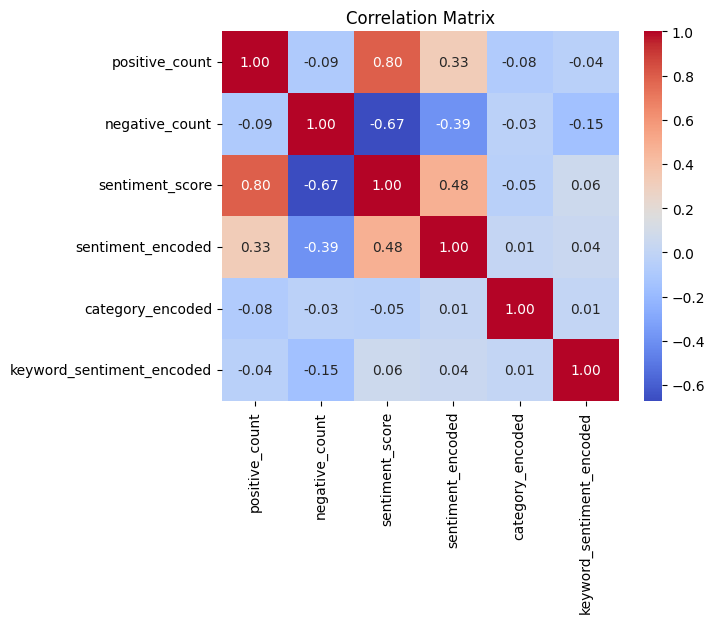

In [158]:
# İlgili sütunlar arasındaki korelasyonu hesaplama
correlation_matrix = temiz_imdb_data[
    ['positive_count', 'negative_count', 'sentiment_score', 'sentiment_encoded', 'category_encoded', 'keyword_sentiment_encoded']
].corr()

# Korelasyon matrisini görselleştirme
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### 3- Veri Eğitimi ve Duygu Analizi

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import scipy.sparse as sp
import joblib

# 1. Giriş özelliklerini ve hedef değişkeni belirleyelim
X = temiz_imdb_data[['review', 'positive_count', 'negative_count', 'sentiment_score', 'category_encoded','sentiment_encoded']]
y = temiz_imdb_data['sentiment_encoded']

Analizimize göre bulduğumuz giriş özelliklerini modelimize dahil edelim.

In [164]:
# 2. Veriyi eğitim, doğrulama ve test setlerine bölelim
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [166]:
# 3. TF-IDF ile metni sayısallaştırma
vectorizer = TfidfVectorizer(max_features=20000)
X_train_tfidf = vectorizer.fit_transform(X_train['review'])
X_val_tfidf = vectorizer.transform(X_val['review'])
X_test_tfidf = vectorizer.transform(X_test['review'])

# 4. Ek özellikleri (positive_count ve negative_count) TF-IDF vektörlerine ekleme
X_train_final = sp.hstack([X_train_tfidf, X_train[['positive_count', 'negative_count','sentiment_score']].values])
X_val_final = sp.hstack([X_val_tfidf, X_val[['positive_count', 'negative_count','sentiment_score']].values])
X_test_final = sp.hstack([X_test_tfidf, X_test[['positive_count', 'negative_count','sentiment_score']].values])

Metinlerimiz vektörleştirip , ek özelliklerimizi vektöre dahil edelim.

#### Basit Makine Öğrenmesi Teknikleri ile Veri Eğitimi

##### 1- Logistic Regresyon Modeli

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

def train_and_save_logistic_regression(X_train_final, y_train, X_val_final, y_val, X_test_final, y_test, save_path="models/basit_log_model.pkl"):
    # 1. Logistic Regression Modeli Oluşturma
    model = LogisticRegression(max_iter=3000)
    
    # 2. Modeli Eğitim Verileriyle Eğitme
    model.fit(X_train_final, y_train)  # Eğitim işlemi burada gerçekleşiyor

    # 3. Doğrulama Seti Üzerinde Tahmin
    y_val_pred = model.predict(X_val_final)
    print("Validation Set Accuracy:", accuracy_score(y_val, y_val_pred))
    print("\nValidation Set Classification Report:\n", classification_report(y_val, y_val_pred))

    # 4. Test Seti Üzerinde Tahmin
    y_test_pred = model.predict(X_test_final)
    print("\nTest Set Accuracy:", accuracy_score(y_test, y_test_pred))
    print("\nTest Set Classification Report:\n", classification_report(y_test, y_test_pred))

        # 5. Eğitilmiş Modeli Kaydetme
    joblib.dump(model, save_path)
    print(f"Model başarıyla kaydedildi: {save_path}")

In [177]:
model.fit(X_train_final, y_train)

LogisticRegression(max_iter=3000)

In [179]:
from sklearn.metrics import classification_report
import pandas as pd

# classification_report'u tabloya dönüştürme ve formatlama fonksiyonu
def print_classification_report(y_true, y_pred, set_name=""):
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    print(f"\n{set_name} Classification Report:\n")
    print(report_df.round(4))  # Tabloda sonuçları 4 basamağa yuvarla

# Validation Set Raporu
y_val_pred = model.predict(X_val_final)
print_classification_report(y_val, y_val_pred, set_name="Validation Set")

# Test Set Raporu
y_test_pred = model.predict(X_test_final)
print_classification_report(y_test, y_test_pred, set_name="Test Set")



Validation Set Classification Report:

              precision  recall  f1-score    support
0                0.8905  0.8831    0.8867  3959.0000
1                0.8864  0.8936    0.8900  4041.0000
accuracy         0.8884  0.8884    0.8884     0.8884
macro avg        0.8884  0.8883    0.8884  8000.0000
weighted avg     0.8884  0.8884    0.8884  8000.0000

Test Set Classification Report:

              precision  recall  f1-score    support
0                0.8961  0.8712    0.8835   4961.000
1                0.8766  0.9006    0.8884   5039.000
accuracy         0.8860  0.8860    0.8860      0.886
macro avg        0.8863  0.8859    0.8859  10000.000
weighted avg     0.8863  0.8860    0.8860  10000.000


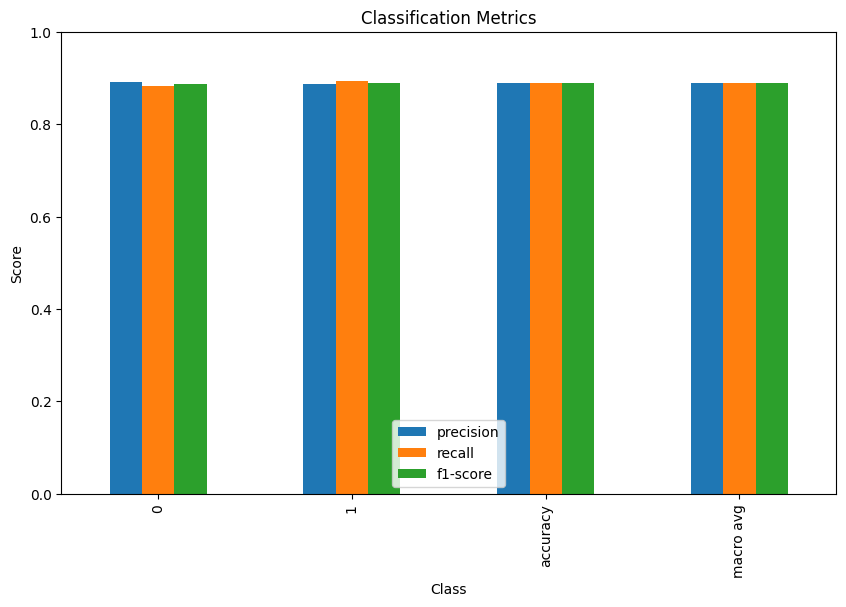

In [181]:
import matplotlib.pyplot as plt

# Bar Grafiği ile Gösterim
report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(10, 6))
plt.title("Classification Metrics")
plt.ylabel("Score")
plt.xlabel("Class")
plt.ylim(0, 1)
plt.show()


Logistic Regresyon modelimizle optimasyon uygulanmadan önce 0.88 lik başarı elde ediyoruz.

##### 2- Random Forest Classifier Modeli

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import joblib

def train_and_save_random_forest(X_train_final, y_train, X_val_final, y_val, X_test_final, y_test, save_path="models/random_forest_model.pkl"):
    # 1. Random Forest Modeli ile Eğitim
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_final, y_train)  # Eğitim işlemi burada gerçekleşiyor

    # 2. Doğrulama Seti Üzerinde Tahmin
    y_val_pred = model.predict(X_val_final)
    val_accuracy = accuracy_score(y_val, y_val_pred)  # Validation accuracy
    print("Validation Set Accuracy:", val_accuracy)
    print("\nValidation Set Classification Report:\n")
    print(pd.DataFrame(classification_report(y_val, y_val_pred, output_dict=True)).transpose().round(4))

    # 3. Test Seti Üzerinde Tahmin
    y_test_pred = model.predict(X_test_final)
    test_accuracy = accuracy_score(y_test, y_test_pred)  # Test accuracy
    print("\nTest Set Accuracy:", test_accuracy)
    print("\nTest Set Classification Report:\n")
    print(pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)).transpose().round(4))

    # 4. Eğitilmiş Modeli Kaydetme
    joblib.dump(model, save_path)
    print(f"Model başarıyla kaydedildi: {save_path}")

    return val_accuracy, test_accuracy  # Accuracy'leri döndür

In [189]:
val_acc, test_acc = train_and_save_random_forest(X_train_final, y_train, X_val_final, y_val, X_test_final, y_test)
print(f"Validation Accuracy: {val_acc}, Test Accuracy: {test_acc}")

Validation Set Accuracy: 0.844625

Validation Set Classification Report:

              precision  recall  f1-score    support
0                0.8429  0.8431    0.8430  3959.0000
1                0.8463  0.8461    0.8462  4041.0000
accuracy         0.8446  0.8446    0.8446     0.8446
macro avg        0.8446  0.8446    0.8446  8000.0000
weighted avg     0.8446  0.8446    0.8446  8000.0000

Test Set Accuracy: 0.8435

Test Set Classification Report:

              precision  recall  f1-score     support
0                0.8478  0.8343    0.8410   4961.0000
1                0.8394  0.8526    0.8459   5039.0000
accuracy         0.8435  0.8435    0.8435      0.8435
macro avg        0.8436  0.8434    0.8435  10000.0000
weighted avg     0.8436  0.8435    0.8435  10000.0000
Model başarıyla kaydedildi: models/random_forest_model.pkl
Validation Accuracy: 0.844625, Test Accuracy: 0.8435


Random forest ile daha düşük bir sonuçla 0.84'lük başarı elde ediyoruz.

#### Derin Öğrenme ile Veri Eğitimi

In [191]:
import pandas as pd
file_path = r"C:\Users\aksoy\Desktop\temiz_imdb_data.csv"
temiz_imdb_data = pd.read_csv(file_path)

##### Dense Neural Network Modeli

In [194]:
import tensorflow as tf
from tensorflow.keras.layers import Input
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

def build_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Dense(512, activation='relu'),
        Dropout(0.8),
        Dense(256, activation='relu'),
        Dropout(0.8),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')  # Çıkış katmanı
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [196]:
def prepare_data(temiz_imdb_data):

    vectorizer = TfidfVectorizer(max_features=30000)
    X_text = vectorizer.fit_transform(temiz_imdb_data['review'])

    X_additional = temiz_imdb_data[['positive_count', 'negative_count','sentiment_score']].to_numpy(dtype=np.float32)

    X_combined = hstack([X_text, X_additional])

    y = tf.keras.utils.to_categorical(temiz_imdb_data['sentiment_encoded'])

    return X_combined, y

In [198]:
def split_data(X_combined, y):

    X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [200]:
def csr_to_sparse_tensor(csr_matrix):

    coo = csr_matrix.tocoo()
    indices = np.vstack((coo.row, coo.col)).T
    return tf.sparse.SparseTensor(indices=indices, values=coo.data, dense_shape=coo.shape)


In [202]:
def main(temiz_imdb_data, save_path_model="models/dnn_model.h5", save_path_data="models/dnn_history.pkl"):
    # 1. Veri Hazırlama
    X_combined, y = prepare_data(temiz_imdb_data)
    X_train, X_test, y_train, y_test = split_data(X_combined, y)

    # 2. Sparse Matris Dönüştürme
    X_train_sparse = csr_to_sparse_tensor(X_train)
    X_test_sparse = csr_to_sparse_tensor(X_test)

    # 3. Model Oluşturma
    model = build_model(input_shape=(X_train.shape[1],))

    # 4. Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # 5. Modeli Eğitme
    history = model.fit(
        X_train_sparse, y_train,
        validation_data=(X_test_sparse, y_test),
        epochs=20, batch_size=16,
        callbacks=[early_stopping]
    )

    # 6. Performans Değerlendirme
    test_loss, test_accuracy = model.evaluate(X_test_sparse, y_test)
    print(f"Test Accuracy: {test_accuracy}")

    # 7. Modeli Kaydetme
    model.save(save_path_model)
    print(f"Model başarıyla kaydedildi: {save_path_model}")

    # 8. Eğitim Geçmişini Kaydetme
    with open(save_path_data, "wb") as f:
        joblib.dump(history.history, f)
    print(f"Eğitim geçmişi başarıyla kaydedildi: {save_path_data}")

    return model, history


In [204]:
trained_model, training_history = main(temiz_imdb_data)

Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 182s 72ms/step - accuracy: 0.7987 - loss: 0.4374 - val_accuracy: 0.8972 - val_loss: 0.2512
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 183s 73ms/step - accuracy: 0.9152 - loss: 0.2261 - val_accuracy: 0.9006 - val_loss: 0.2437
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 184s 73ms/step - accuracy: 0.9361 - loss: 0.1759 - val_accuracy: 0.9018 - val_loss: 0.2429
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 182s 73ms/step - accuracy: 0.9480 - loss: 0.1443 - val_accuracy: 0.9003 - val_loss: 0.2572
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 184s 73ms/step - accuracy: 0.9603 - loss: 0.1184 - val_accuracy: 0.9005 - val_loss: 0.2888
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 184s 74ms/step - accuracy: 0.9694 - loss: 0.0976 - val_accuracy: 0.9006 - val_loss: 0.3292
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 184s 73ms/step - accuracy: 0.9749 - loss: 0.0773 - val_accuracy: 0.9002 - val_loss: 0.3880
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 184s 73ms/step - accuracy: 

Test Accuracy: 0.9017999768257141
Model başarıyla kaydedildi: models/dnn_model.h5
Eğitim geçmişi başarıyla kaydedildi: models/dnn_history.pkl


Dense Neural Network modelimizle  0.90 lik başarı elde ediyoruz.

#### Long Short-Term Memory (Uzun Kısa Süreli Bellek) Modeli

In [207]:
file_path = r"C:\Users\aksoy\Desktop\temiz_imdb_data.csv"
temiz_imdb_data = pd.read_csv(file_path)

In [209]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def prepare_data(temiz_imdb_data, max_words=30000, max_len=100):

    # Metin verisini işleme
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(temiz_imdb_data['review'])
    X_text = tokenizer.texts_to_sequences(temiz_imdb_data['review'])
    X_text = pad_sequences(X_text, maxlen=max_len)

    # Ek özellikleri hazırlama
    X_additional = temiz_imdb_data[['positive_count', 'negative_count', 'sentiment_score']].to_numpy(dtype=np.float32)

    # Metin ve ek özellikleri birleştirme
    X_combined = np.hstack([X_text, X_additional])

    # Hedef değişken
    y = to_categorical(temiz_imdb_data['sentiment_encoded'])

    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

    return X_train, X_test, y_train, y_test, tokenizer

In [211]:
def build_lstm_model(max_words=30000, max_len=100):
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128),
        LSTM(256, return_sequences=False),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')  # Çıkış katmanı
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [213]:
def main(temiz_imdb_data, save_path_model="models/lstm_model.h5", save_path_tokenizer="models/tokenizer.pkl", save_path_history="models/lstm_history.pkl"):
    max_words = 30000
    max_len = 100

    # Veriyi hazırla
    X_train, X_test, y_train, y_test, tokenizer = prepare_data(temiz_imdb_data, max_words, max_len)

    # Model oluştur
    model = build_lstm_model(max_words, max_len)

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

    # Modeli eğitme
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=10, batch_size=16,
        callbacks=[early_stopping]
    )

    # Modelin performansını değerlendirme
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy}")

    # Modeli kaydet
    model.save(save_path_model)
    print(f"Model başarıyla kaydedildi: {save_path_model}")

    # Tokenizer'ı kaydet
    with open(save_path_tokenizer, "wb") as f:
        joblib.dump(tokenizer, f)
    print(f"Tokenizer başarıyla kaydedildi: {save_path_tokenizer}")

    # Eğitim geçmişini kaydet
    with open(save_path_history, "wb") as f:
        joblib.dump(history.history, f)
    print(f"Eğitim geçmişi başarıyla kaydedildi: {save_path_history}")

    return model, history, tokenizer

In [215]:
trained_model, training_history, tokenizer = main(temiz_imdb_data)

Epoch 1/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 504s 229ms/step - accuracy: 0.7803 - loss: 0.4624 - val_accuracy: 0.8813 - val_loss: 0.2874
Epoch 2/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 483s 221ms/step - accuracy: 0.9271 - loss: 0.2019 - val_accuracy: 0.8793 - val_loss: 0.3065
Epoch 3/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 495s 226ms/step - accuracy: 0.9611 - loss: 0.1135 - val_accuracy: 0.8752 - val_loss: 0.3672
Epoch 4/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 493s 225ms/step - accuracy: 0.9789 - loss: 0.0647 - val_accuracy: 0.8708 - val_loss: 0.4749
Epoch 5/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 493s 225ms/step - accuracy: 0.9917 - loss: 0.0286 - val_accuracy: 0.8687 - val_loss: 0.5332
Epoch 6/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 498s 228ms/step - accuracy: 0.9947 - loss: 0.0198 - val_accuracy: 0.8602 - val_loss: 0.6519
Epoch 7/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 491s 224ms/step - accuracy: 0.9963 - loss: 0.0125 - val_accuracy: 0.8652 - val_loss: 0.7490
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 127ms/step - accuracy: 0.8832

Test Accuracy: 0.8812666535377502
Model başarıyla kaydedildi: models/lstm_model.h5
Tokenizer başarıyla kaydedildi: models/tokenizer.pkl
Eğitim geçmişi başarıyla kaydedildi: models/lstm_history.pkl


LSTM modelimizle optimasyon uygulanmadan önce 0.88 lik başarı elde ediyoruz.

#### CNN Modeli

In [217]:
file_path = r"C:\Users\aksoy\Desktop\temiz_imdb_data.csv"
temiz_imdb_data = pd.read_csv(file_path)

In [218]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Embedding, Input
import numpy as np
from scipy.sparse import hstack
import joblib

def prepare_data(temiz_imdb_data, max_words=30000, max_len=300):
    """Veriyi hazırla: Tokenizer ve padding uygula, ek özelliklerle birleştir."""
    # Metin verisini işleme
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(temiz_imdb_data['review'])
    X_text = tokenizer.texts_to_sequences(temiz_imdb_data['review'])
    X_text = pad_sequences(X_text, maxlen=max_len)

    # Ek özellikleri hazırlama
    X_additional = temiz_imdb_data[['positive_count', 'negative_count', 'sentiment_score']].to_numpy(dtype=np.float32)

    # Metin ve ek özellikleri birleştirme
    X_combined = np.hstack([X_text, X_additional])

    # Hedef değişken
    y = to_categorical(temiz_imdb_data['sentiment_encoded'])

    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

    return X_train, X_test, y_train, y_test, tokenizer

def build_cnn_model(input_shape, embedding_dim=128):
    """CNN tabanlı model oluştur ve derle."""
    model = Sequential([
        Input(shape=input_shape),
        Embedding(input_dim=30000, output_dim=embedding_dim, input_length=input_shape[0]),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def main(temiz_imdb_data, save_path_model="models/cnn_model.h5", save_path_tokenizer="models/cnn_tokenizer.pkl", save_path_history="models/cnn_history.pkl"):
    """CNN modeli için ana süreç."""
    # Veri hazırlama
    X_train, X_test, y_train, y_test, tokenizer = prepare_data(temiz_imdb_data)

    # Model oluşturma
    model = build_cnn_model(input_shape=(X_train.shape[1],))

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Modeli eğitme
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=15, batch_size=32,
        callbacks=[early_stopping]
    )

    # Performans değerlendirme
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy}")

    # Modeli kaydetme
    model.save(save_path_model)
    print(f"Model başarıyla kaydedildi: {save_path_model}")

    # Tokenizer'ı kaydetme
    with open(save_path_tokenizer, "wb") as f:
        joblib.dump(tokenizer, f)
    print(f"Tokenizer başarıyla kaydedildi: {save_path_tokenizer}")

    # Eğitim geçmişini kaydetme
    with open(save_path_history, "wb") as f:
        joblib.dump(history.history, f)
    print(f"Eğitim geçmişi başarıyla kaydedildi: {save_path_history}")

    return model, history, tokenizer


In [221]:
X_train, X_test, y_train, y_test, tokenizer = prepare_data(temiz_imdb_data)

In [223]:
input_shape = (X_train.shape[1],)
cnn_model = build_cnn_model(input_shape)

C:\Users\aksoy\tf_env\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [225]:
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 47s 51ms/step - accuracy: 0.7199 - loss: 0.4884 - val_accuracy: 0.8961 - val_loss: 0.2545
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - accuracy: 0.9544 - loss: 0.1303 - val_accuracy: 0.8636 - val_loss: 0.3630
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - accuracy: 0.9850 - loss: 0.0461 - val_accuracy: 0.8794 - val_loss: 0.4516
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - accuracy: 0.9937 - loss: 0.0192 - val_accuracy: 0.8816 - val_loss: 0.5782
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.9961 - loss: 0.0125 - val_accuracy: 0.8803 - val_loss: 0.7598
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.9957 - loss: 0.0146 - val_accuracy: 0.8801 - val_loss: 0.8903
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.9967 - loss: 0.0108 - val_accuracy: 0.8810 - val_loss: 0.8755
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - accuracy: 0.9957 - loss: 0.0115 - 

In [227]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8794 - loss: 0.8966
Test Accuracy: 0.88


CNN modeli ile 0.88 lık  bir skor alıyoruz.

#### DNN ve Logistic Regresyon ile Enseble Model Oluşturma

In [1]:
import pandas as pd
file_path = r"C:\Users\aksoy\Desktop\temiz_imdb_data.csv"
temiz_imdb_data = pd.read_csv(file_path)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
import joblib

def build_dnn_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Dense(512, activation='relu'),
        Dropout(0.8),
        Dense(256, activation='relu'),
        Dropout(0.8),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_meta_ensemble(temiz_imdb_data, save_path_dnn="models/dnn_model.h5", save_path_logreg="models/logreg_model.pkl", save_path_meta="models/meta_model.pkl", save_path_vectorizer="models/tfidf_vectorizer.pkl"):
    # 1. Data Preparation
    vectorizer = TfidfVectorizer(max_features=30000)
    X_text = vectorizer.fit_transform(temiz_imdb_data['review'])
    X_additional = temiz_imdb_data[['positive_count', 'negative_count', 'sentiment_score']].to_numpy(dtype=np.float32)
    y = tf.keras.utils.to_categorical(temiz_imdb_data['sentiment_encoded'])

    # Train-Test Split
    X_train_text, X_test_text, X_train_add, X_test_add, y_train, y_test = train_test_split(
        X_text, X_additional, y, test_size=0.2, random_state=42
    )

    # 2. DNN Model Training
    dnn_model = build_dnn_model(input_shape=(X_train_text.shape[1],))
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    dnn_model.fit(
        X_train_text.toarray(), y_train,
        validation_data=(X_test_text.toarray(), y_test),
        epochs=20, batch_size=16, callbacks=[early_stopping]
    )
    dnn_train_preds = dnn_model.predict(X_train_text.toarray())
    dnn_test_preds = dnn_model.predict(X_test_text.toarray())

    # 3. Logistic Regression Model Training
    X_train_combined = hstack([X_train_text, X_train_add])
    X_test_combined = hstack([X_test_text, X_test_add])

    logreg = LogisticRegression(max_iter=5000)
    logreg.fit(X_train_combined, np.argmax(y_train, axis=1))

    logreg_train_preds = logreg.predict_proba(X_train_combined)
    logreg_test_preds = logreg.predict_proba(X_test_combined)

    # 4. Meta Model Training
    combined_train_preds = np.hstack([dnn_train_preds, logreg_train_preds])
    combined_test_preds = np.hstack([dnn_test_preds, logreg_test_preds])

    meta_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
    meta_model.fit(combined_train_preds, np.argmax(y_train, axis=1))

    # Final Predictions
    final_test_preds = meta_model.predict(combined_test_preds)

    # Accuracy Score
    test_accuracy = accuracy_score(np.argmax(y_test, axis=1), final_test_preds)
    print(f"Meta Model Test Accuracy: {test_accuracy:.2f}")

    # Save Models and Vectorizer
    dnn_model.save(save_path_dnn)
    print(f"DNN Model saved to {save_path_dnn}")

    joblib.dump(logreg, save_path_logreg)
    print(f"Logistic Regression Model saved to {save_path_logreg}")

    joblib.dump(meta_model, save_path_meta)
    print(f"Meta Model saved to {save_path_meta}")

    with open(save_path_vectorizer, "wb") as f:
        joblib.dump(vectorizer, f)
    print(f"TF-IDF Vectorizer saved to {save_path_vectorizer}")

    return test_accuracy


In [4]:
test_accuracy = train_meta_ensemble(temiz_imdb_data)

Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 186s 73ms/step - accuracy: 0.7865 - loss: 0.4289 - val_accuracy: 0.9027 - val_loss: 0.2482
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 181s 72ms/step - accuracy: 0.9209 - loss: 0.2096 - val_accuracy: 0.9023 - val_loss: 0.2382
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 175s 70ms/step - accuracy: 0.9434 - loss: 0.1570 - val_accuracy: 0.9016 - val_loss: 0.2531
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 175s 70ms/step - accuracy: 0.9602 - loss: 0.1168 - val_accuracy: 0.8996 - val_loss: 0.2634
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 179s 72ms/step - accuracy: 0.9700 - loss: 0.0900 - val_accuracy: 0.9005 - val_loss: 0.3279
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 179s 72ms/step - accuracy: 0.9768 - loss: 0.0704 - val_accuracy: 0.8995 - val_loss: 0.3690
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 178s 71ms/step - accuracy: 0.9795 - loss: 0.0663 - val_accuracy: 0.8972 - val_loss: 0.3741
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step
313/313 ━━━━━━━━━━━━━━━━

Meta Model Test Accuracy: 0.90
DNN Model saved to models/dnn_model.h5
Logistic Regression Model saved to models/logreg_model.pkl
Meta Model saved to models/meta_model.pkl
TF-IDF Vectorizer saved to models/tfidf_vectorizer.pkl


Ensemble model çalışmamızda da 0.90 doğruluğun üzerinde bir doğruluğa ulaşamıyoruz.

#### Modellerin Karşılaştırılması

Ensemle model ve Dnn model aynı sonucu verdiği için DNN model daha basit yapısıyla tercih edilebilir.

#### LDA Algoritması ile Konu Analizi

In [7]:
import pandas as pd
file_path = r"C:\Users\aksoy\Desktop\temiz_imdb_data.csv"
temiz_imdb_data = pd.read_csv(file_path)

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.ldamodel import LdaModel
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from tqdm import tqdm

# 1. Veriyi Al (10,000 yorum seçiyoruz)
reviews = temiz_imdb_data['review'].astype(str).sample(10000, random_state=42)  # Rastgele 10,000 yorum seç

# 2. Term Document Matrix (Kelime Frekansı Matrisi)
vectorizer = CountVectorizer(max_features=1000)  # İlk 1000 kelimeyi al
X = vectorizer.fit_transform(reviews)
terms = vectorizer.get_feature_names_out()

# 3. LDA Modeli için Girdi Hazırlama
# Kelime-Doküman Matrisi
corpus = [text.split() for text in reviews]
id2word = corpora.Dictionary(corpus)
corpus_gensim = [id2word.doc2bow(text) for text in corpus]

# 4. LDA Modeli (İlerleme çubuğu entegre)
lda_model = LdaModel(corpus=corpus_gensim, id2word=id2word, num_topics=5, random_state=42)

# Eğitimi birden fazla geçişle (epoch) yapmak ve tqdm ile ilerleme çubuğu göstermek
for i in tqdm(range(10), desc="LDA Modeli Eğitim Aşamaları (Epochs)"):
    lda_model.update(corpus_gensim)

# Konuları Yazdırma
topics = lda_model.print_topics(num_words=10)
print("Konu Dağılımları:")
for idx, topic in topics:
    print(f"Konu {idx + 1}: {topic}")

# 5. Konu Görselleştirme
pyLDAvis.enable_notebook()
lda_vis = gensimvis.prepare(lda_model, corpus_gensim, id2word)
pyLDAvis.display(lda_vis)


LDA Modeli Eğitim Aşamaları (Epochs): 100%|██████████| 10/10 [02:19<00:00, 13.91s/it]


Konu Dağılımları:
Konu 1: 0.007*"film" + 0.007*"one" + 0.003*"man" + 0.003*"the" + 0.003*"good" + 0.002*"little" + 0.002*"films" + 0.002*"even" + 0.002*"horror" + 0.002*"time"
Konu 2: 0.008*"game" + 0.007*"bond" + 0.005*"dracula" + 0.005*"james" + 0.004*"games" + 0.004*"connery" + 0.004*"custer" + 0.004*"sean" + 0.003*"war" + 0.003*"flynn"
Konu 3: 0.028*"movie" + 0.011*"film" + 0.010*"one" + 0.008*"good" + 0.007*"really" + 0.006*"it" + 0.006*"even" + 0.006*"bad" + 0.006*"see" + 0.005*"time"
Konu 4: 0.018*"film" + 0.007*"films" + 0.005*"best" + 0.004*"one" + 0.002*"music" + 0.002*"new" + 0.002*"tarzan" + 0.002*"andrews" + 0.002*"hoffman" + 0.002*"last"
Konu 5: 0.018*"film" + 0.008*"one" + 0.005*"story" + 0.004*"movie" + 0.004*"life" + 0.004*"great" + 0.004*"will" + 0.004*"love" + 0.003*"films" + 0.003*"time"


- Topic 1: Sinema ve Genel Film Yorumları
*Anahtar Kelimeler: "movie", "film", "good", "bad", "acting", "story", "characters", "plot".*
*İçerik: Genel film değerlendirmeleri, oyunculuk, hikaye ve film karakterleri hakkında yorumları içeriyor.*
*Olası Etiket: "Genel Film Eleştirileri".*
- Topic 2: Dramatik ve Kişisel Hikayeler
*Anahtar Kelimeler: "life", "family", "love", "emotional", "father", "mother", "relationship", "child".*
*İçerik: Aile içi ilişkiler, sevgi, kayıp ve duygusal hikayeler üzerine odaklanmış.*
*Olası Etiket: "Aile ve Duygusal Hikayeler".*
- Topic 3: Korku ve Gerilim Filmleri
*Anahtar Kelimeler: "horror", "scene", "death", "police", "story", "dead", "dark", "plot".*
*İçerik: Korku ve gerilim filmleriyle ilgili yorumları içeriyor. Ölüm, karanlık sahneler ve korku öğeleri öne çıkıyor.*
*Olası Etiket: "Korku ve Gerilim".*
- Topic 4: Tarih ve Savaş Temalı Filmler
*Anahtar Kelimeler: "war", "battle", "history", "soldier", "army", "fight", "victory", "hero".*
*İçerik: Tarihi olaylar, savaşlar ve kahramanlık hikayelerine odaklanmış.*
*Olası Etiket: "Tarihi ve Savaş Filmleri".*
- Topic 5: Kült Karakterler ve Aksiyon
*Anahtar Kelimeler: "game", "bond", "dracula", "frankenstein", "james", "wolf", "007", "connery".*
*İçerik: Kült film karakterleri (James Bond, Dracula, Frankenstein) ve aksiyon-macera filmleri temalı içerik.*
*Olası Etiket: "Kült Karakterler ve Aksiyon".*